In [1]:
# %pip install torchvision

공개된 데이터를 가지고 로지스틱 회귀 진행 실습

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

"""
라벨정보
0 T-shirt/top (티셔츠)
1 Trouser (바지)
2 Pullover (스웨터)
3 Dress (드레스)
4 Coat (코트)
5 Sandal (샌들)
6 Shirt (셔츠)
7 Sneaker (운동화)
8 Bag (가방)
9 Ankle boot (앵클부츠)
"""

'\n라벨정보\n0 T-shirt/top (티셔츠)\n1 Trouser (바지)\n2 Pullover (스웨터)\n3 Dress (드레스)\n4 Coat (코트)\n5 Sandal (샌들)\n6 Shirt (셔츠)\n7 Sneaker (운동화)\n8 Bag (가방)\n9 Ankle boot (앵클부츠)\n'

데이터셋 다운로드 및 DataLoader 생성

In [3]:
# 데이터셋 다운로드 및 DataLoader 생성
train_dataset = dataset.FashionMNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dataset.FashionMNIST(root="./data", train=False, transform=transforms.ToTensor(), download=True)

# train Loader test Loader 설정
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

모델 정의

In [4]:
class LogisticRegression (nn.Module) :

    def __init__(self, input_size, num_classes) :
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x) :
        out = self.linear(x)
        return out

하이퍼 파라미터 설정

In [5]:
input_size = 28 * 28
num_classes = 10
num_epochs = 10
lr = 0.001
total_step = len(train_loader)

Model, Loss, Optimizer 정의

In [6]:
model = LogisticRegression(input_size=input_size, num_classes=num_classes)
# print (model)
criterion = nn.CrossEntropyLoss()
optimizer = optim. SGD(model.parameters (), lr=lr, momentum=0.9)

# device setting
device = torch.device ('cuda' if torch.cuda.is_available () else 'cpu')
print ( "Using Device >> ", device)
model.to(device)

Using Device >>  cpu


LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

Train Loop

Epoch [1/10], Step [100/600], Loss 1.2228, Train ACC : 0.7000
Epoch [1/10], Step [200/600], Loss 1.0027, Train ACC : 0.7350
Epoch [1/10], Step [300/600], Loss 1.0126, Train ACC : 0.7300
Epoch [1/10], Step [400/600], Loss 0.8868, Train ACC : 0.7275
Epoch [1/10], Step [500/600], Loss 0.7615, Train ACC : 0.7280
Epoch [1/10], Step [600/600], Loss 0.6980, Train ACC : 0.7383
Epoch [2/10], Step [100/600], Loss 0.7819, Train ACC : 0.7400
Epoch [2/10], Step [200/600], Loss 0.7788, Train ACC : 0.7300
Epoch [2/10], Step [300/600], Loss 0.6894, Train ACC : 0.7500
Epoch [2/10], Step [400/600], Loss 0.6143, Train ACC : 0.7700
Epoch [2/10], Step [500/600], Loss 0.7409, Train ACC : 0.7600
Epoch [2/10], Step [600/600], Loss 0.7030, Train ACC : 0.7600
Epoch [3/10], Step [100/600], Loss 0.6973, Train ACC : 0.7300
Epoch [3/10], Step [200/600], Loss 0.7003, Train ACC : 0.7750
Epoch [3/10], Step [300/600], Loss 0.6728, Train ACC : 0.7633
Epoch [3/10], Step [400/600], Loss 0.5761, Train ACC : 0.7775
Epoch [3

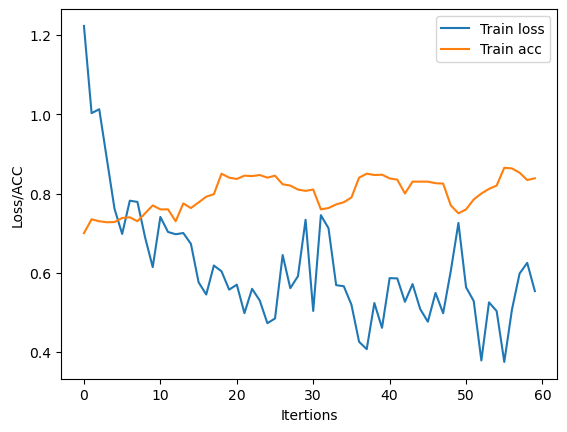

In [7]:
loss_list = []
acc_list = []

for epoch in range(num_epochs):
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader):
        
        # 데이터 로드
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()   # 초기화

        # 순전파 및 Loss 계산
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 역전파 및 가중치 업데이트
        loss.backward()
        optimizer.step()    # 갱신
        
        # 로그 출력
        if (i+1) % 100 == 0 :
            loss_list.append(loss.item())
            _,predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            acc_list.append(correct / total)
            
            print('Epoch [{}/{}], Step [{}/{}], Loss {:.4f}, Train ACC : {:.4f}'.format(
                epoch+1, num_epochs, i+1, total_step, loss.item(), acc_list[-1]))
            
# 손실 및 정확도 그래프 출력
plt.plot(loss_list, label='Train loss')
plt.plot(acc_list, label='Train acc')
plt.xlabel('Itertions')
plt.ylabel('Loss/ACC')
plt.legend()
plt.show()

테스트 시각화

In [8]:
import numpy as np

# test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = 100, shuffle=False)
# batch_size 만큼 이미지가 넘어옴 16 이상으로 설정

# 테스트 이미지 가져오기
dataiter = iter(test_loader)
images,labels = dataiter.__next__()
images_temp = images.reshape(-1,28,28)
# print(images_temp)

# 모델 예측
model.eval()
outputs_temp = model(images_temp)
_,predicted_test = torch.max(outputs_temp.data,1)
# print(predicted_test)

# 이미지와 예측값 시각화
fig,axes = plt.subplots(nrows=4, ncols=4, figszie=(8,8), subplot_kw={'xticks' : [], 'yticks':[]})
for i, ax in  enumerate(axes.flat):
    ax.imshow(np.squeeze(images[i].reshape(28,28)), cmap='gray')
    ax.set_title(f'predicted : {predicted_test[i].item()}')

plt.tight_layout()
plt.show()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2800x28 and 784x10)